In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('../results/raw/run2/all_results.csv', delimiter=';')
df.head()

,thread,max threads,time,N,M,steps
0,1,2,3.137679,1000,1000,100
1,0,2,3.226295,1000,1000,100
2,1,2,28.648657,1000,1000,1000
3,0,2,28.773441,1000,1000,1000
4,1,2,269.518831,1000,1000,10000


In [41]:
df_simple = df.groupby(["max threads", "N", "M", "steps"], as_index=False).time.max()
df_simple.head()

,max threads,N,M,steps,time
0,2,100,100,100,3.008608
1,2,100,100,1000,30.182583
2,2,100,100,10000,151.455907
3,2,100,100,100000,997.242430
4,2,1000,1000,100,3.226295


In [42]:
def create_pivot_for_max_threads(max_threads)-> pd.DataFrame:
  df_filtered = df_simple[df_simple["max threads"] == max_threads].copy()
  df_filtered["NM"] = df_filtered["N"].astype(str) + "x" + df_filtered["M"].astype(str)
  return df_filtered.pivot_table(index="NM", columns="steps", values="time")

In [43]:
for max_threads in df_simple["max threads"].unique():
  df_pivot = create_pivot_for_max_threads(max_threads)
  df_pivot.columns = [str(col) for col in df_pivot.columns]
  df_pivot.index.name = "N x M"
  df_pivot.columns.name = "steps"
  print(f"Nodes: {max_threads}")
  print(df_pivot)
  print()



Nodes: 2
steps           100       1000       10000       100000
N x M                                                  
1000x1000  3.226295  28.773441  269.608456  2451.152783
100x100    3.008608  30.182583  151.455907   997.242430
2000x2000  4.463269  42.416510  323.633867  2576.611911

Nodes: 4
steps           100       1000       10000       100000
N x M                                                  
1000x1000  3.466167  32.299433  318.805040  3184.036661
100x100    2.661267  26.713319  372.033094  2572.231210
2000x2000  5.508030  47.554560  437.503118  3524.018770

Nodes: 5
steps           100       1000       10000       100000
N x M                                                  
1000x1000  2.874023  27.269382  382.538333  3183.711562
100x100    2.222764  23.600960  310.150252  3098.737703
2000x2000  4.407035  36.218476  428.217962  3336.180224



In [44]:
def plot_time_steps_and_size(df, threads):
       subset = df[df["max threads"] == threads].copy()
       subset["Size"] = subset["N"].astype(str) + "x" + subset["M"].astype(str)
       subset = subset.sort_values("steps")
       

       sns.set_theme(style="whitegrid", palette="colorblind")
       
       plt.figure(figsize=(8, 5))
       ax = sns.lineplot(
              data=subset,
              x="steps",
              y="time",
              hue="Size",
              marker="o"
       )
       
       ax.set_title(f"Performance for {threads} nodes", fontsize=14)
       ax.set_xlabel("Steps", fontsize=12)
       ax.set_ylabel("Time (s)", fontsize=12)
       ax.grid(True, linestyle="--", linewidth=0.5)
       plt.legend(title="Size", title_fontsize=12, fontsize=10)
       plt.tight_layout()
       plt.show()

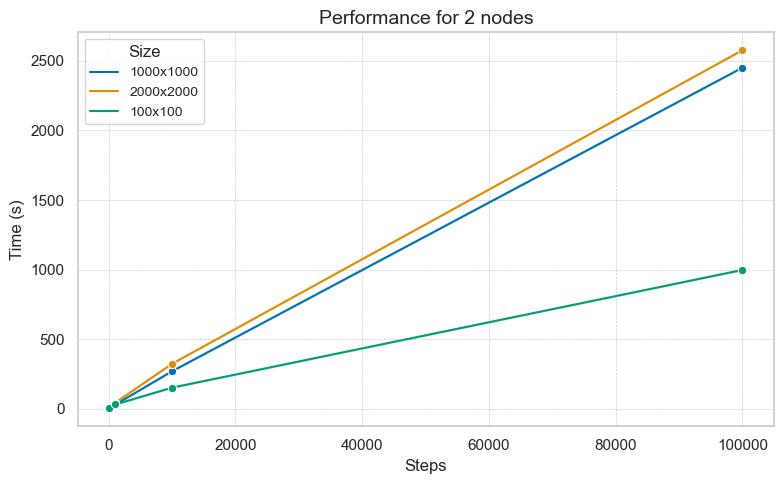

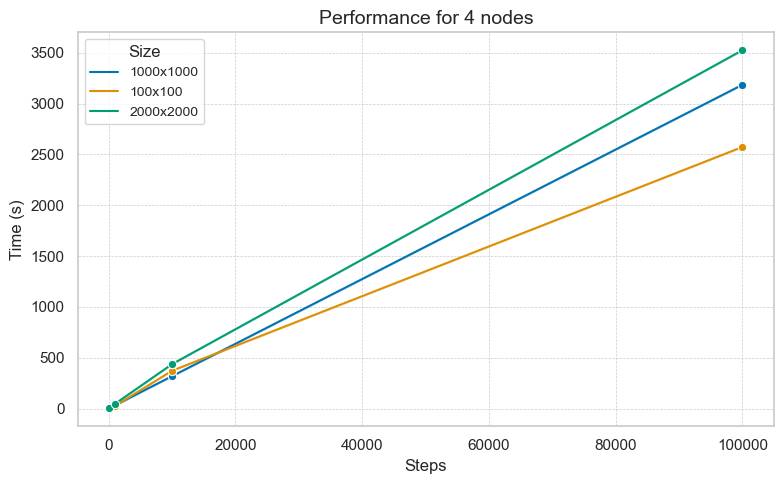

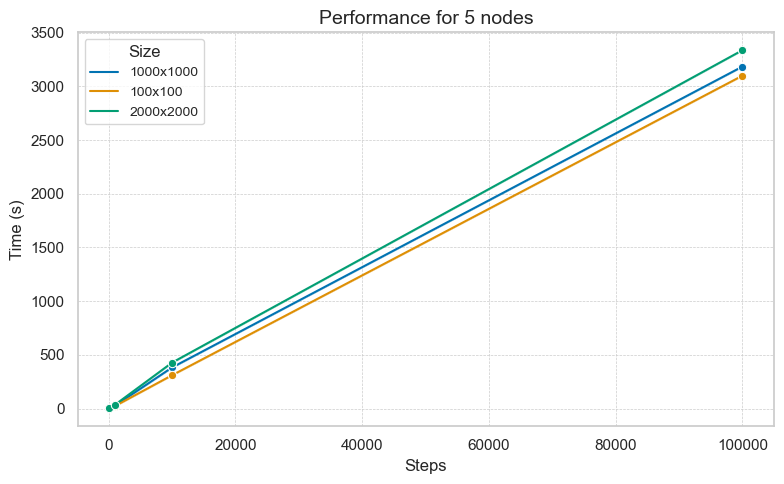

In [45]:
for max_threads in df_simple["max threads"].unique():
  plot_time_steps_and_size(df, max_threads)